# Review: computer vision transfer learning

This is a subset of lesson 1 of https://course.fast.ai <br>
Joseph Catanzarite's Note: I did not refactor or annotate this notebook, because it is perfect!!

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%.

In [3]:
path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'
np.random.seed(2)
fnames = get_image_files(path_img)
fnames[0]

WindowsPath('C:/Users/cross-entropy/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

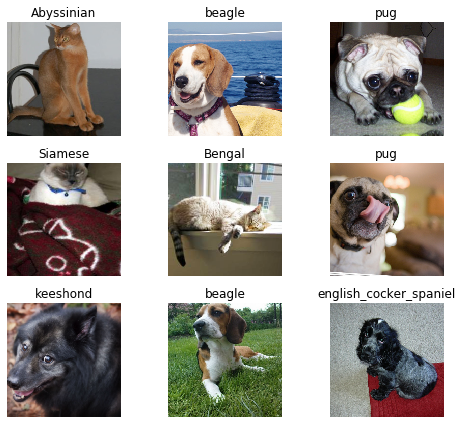

In [4]:
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

## Training

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [6]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.398183,0.354283,0.107578,01:33
1,0.616111,0.319888,0.096752,01:27
2,0.390652,0.264836,0.081191,01:30
3,0.291671,0.244715,0.071719,01:29


In [7]:
learn.save('stage-1')

In [8]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.245862,0.234735,0.076455,01:27
1,0.216865,0.234753,0.072395,01:31


In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 5),
 ('chihuahua', 'miniature_pinscher', 5),
 ('Birman', 'Ragdoll', 4),
 ('Birman', 'Siamese', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Persian', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('British_Shorthair', 'Bombay', 2),
 ('Ragdoll', 'Siamese', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'boxer', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2)]